# Required libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings

In [2]:
warnings.filterwarnings('ignore')

# Dataset

In [3]:
#Read dataset
df = pd.read_csv('https://raw.githubusercontent.com/martmor123/jr_ds_test/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data overview

In [4]:
#Variables overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#TotalCharges must be numeric, not object
#Analyze TotalCharges values
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

# Data cleaning

In [6]:
#See if we have unique IDs in order to drop it
df['customerID'].nunique(dropna = False)

7043

In [7]:
#Drop ID column
df.drop('customerID', axis = 1, inplace = True)

In [8]:
#Replace blanks for NAN & change data type of TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
#Analyze NA 
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


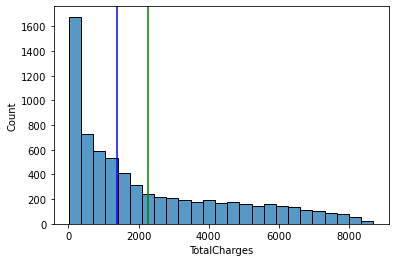

In [10]:
#Analyze NA to remove or leave
sns.histplot(x = "TotalCharges", data = df)
plt.axvline(df.TotalCharges.median(), color = 'blue')
plt.axvline(df.TotalCharges.mean(), color = 'green');

In [11]:
#Drop NA
df.dropna(inplace = True)

In [12]:
#Splitting our data on categorical & continuous variables 
categorical, continuous = [], []
for col in df.columns:
    if df[col].nunique() < 5:
        categorical.append(col)
        print('Categorical: {} #{}'.format(col, df[col].nunique()))
    else:
        continuous.append(col)
        print('Continuous: {} #{}'.format(col, df[col].nunique()))

Categorical: gender #2
Categorical: SeniorCitizen #2
Categorical: Partner #2
Categorical: Dependents #2
Continuous: tenure #72
Categorical: PhoneService #2
Categorical: MultipleLines #3
Categorical: InternetService #3
Categorical: OnlineSecurity #3
Categorical: OnlineBackup #3
Categorical: DeviceProtection #3
Categorical: TechSupport #3
Categorical: StreamingTV #3
Categorical: StreamingMovies #3
Categorical: Contract #3
Categorical: PaperlessBilling #2
Categorical: PaymentMethod #4
Continuous: MonthlyCharges #1584
Continuous: TotalCharges #6530
Categorical: Churn #2


# Exploratory analysis

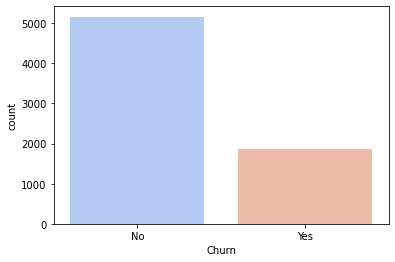

In [13]:
#Dependent variable
sns.countplot(x='Churn', data=df, palette = "coolwarm");

### Demographics

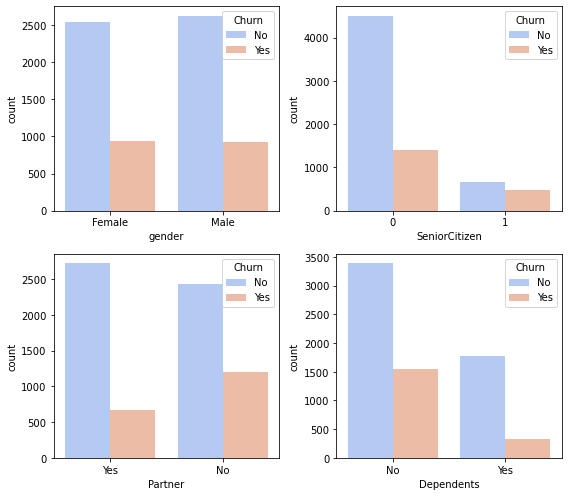

In [14]:
#Analyze demographics variables with our dependent variable
fig, axes = plt.subplots(2, 2, figsize=(8, 7), tight_layout=True)
for col, ax in zip(categorical[:4], axes.flat):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax, palette="coolwarm")

### Services

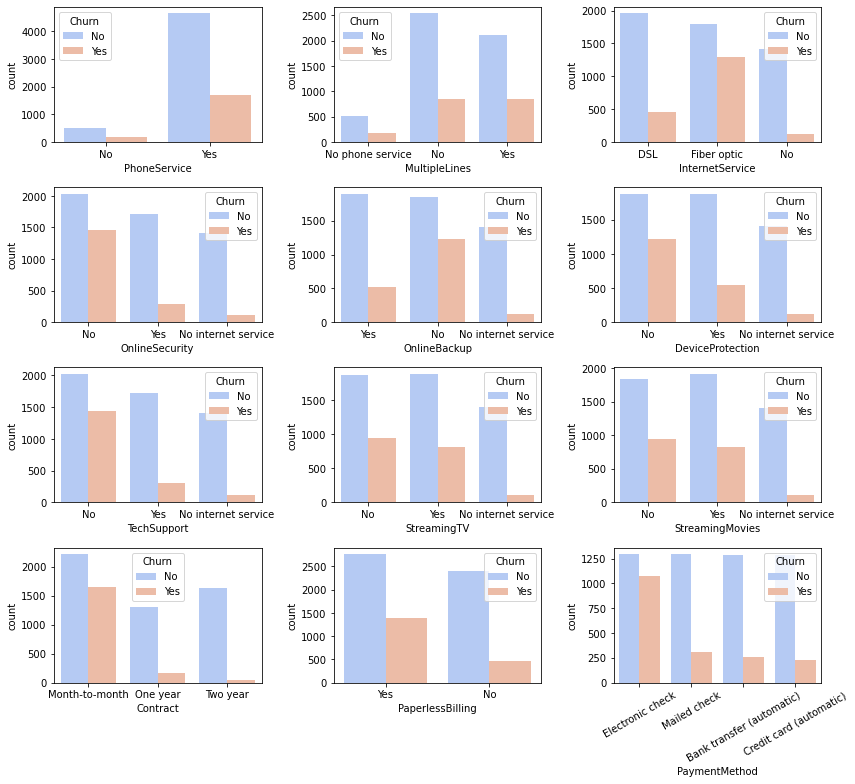

In [15]:
#Analyze services variables with our dependent variable
fig, axes = plt.subplots(4, 3, figsize=(12, 11), tight_layout=True)
for col, ax in zip(categorical[4:-1], axes.flat):
    sns.countplot(x=col, data=df, hue = 'Churn', ax=ax, palette="coolwarm")
plt.xticks(rotation=30);

### Continuous

In [16]:
noC = df[df.Churn == 'No']
yesC = df[df.Churn == 'Yes']

In [17]:
print(noC.MonthlyCharges.mean(),noC.MonthlyCharges.median())

61.30740848343966 64.45


In [18]:
print(noC.TotalCharges.mean(),noC.TotalCharges.median())

2555.3441410032997 1683.6


In [19]:
print(yesC.MonthlyCharges.mean(),yesC.MonthlyCharges.median())

74.4413322632423 79.65


In [20]:
print(yesC.TotalCharges.mean(),yesC.TotalCharges.median())

1531.7960941680035 703.55


In [21]:
df[continuous].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


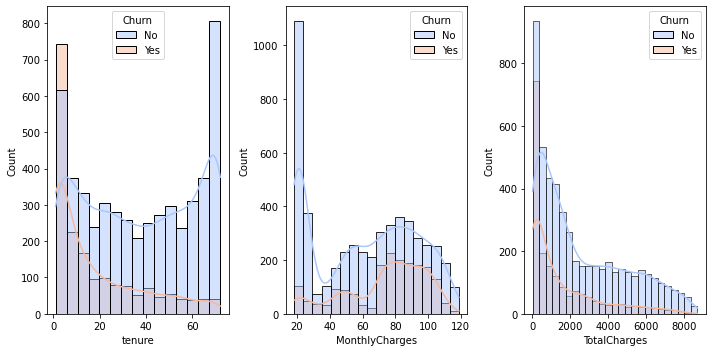

In [22]:
#Churn based on continuous variables
fig, axes = plt.subplots(1, 3, figsize = (10,5), tight_layout = True)
for col, ax in zip(continuous[:], axes.flat):
    sns.histplot(x = col, ax = ax, data = df, hue = 'Churn', palette='coolwarm', kde = True)

# Data transformation

In [23]:
#Create dummies variables
df_f = pd.get_dummies(df, columns=categorical, drop_first=True)
df_f.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [24]:
#Scale continuous variables according to our graphs 
mmscaler = MinMaxScaler()
df_f[continuous] = mmscaler.fit_transform(df_f[continuous])

In [25]:
df_f.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.000000,0.115423,0.001275,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.464789,0.385075,0.215867,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.014085,0.354229,0.010310,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.619718,0.239303,0.210241,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.014085,0.521891,0.015330,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


# Removing multicollinearity

<AxesSubplot:>

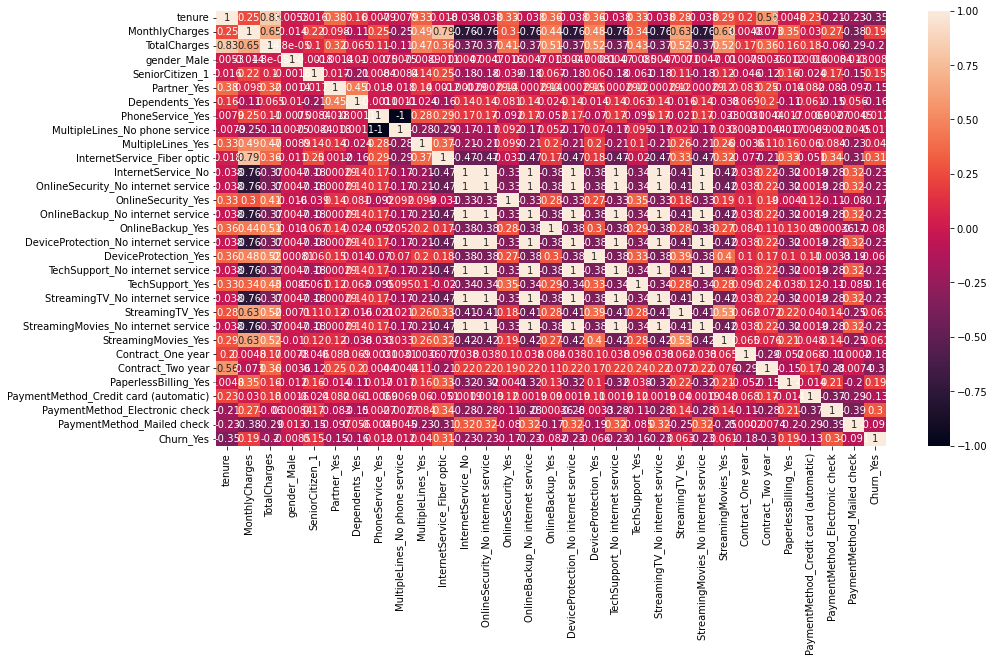

In [26]:
#Correlated variables 
plt.figure(figsize=(15,8))
sns.heatmap(df_f.corr(), annot = True)

In [27]:
#Removing correlated columns
colfinal = [col for col in df_f.columns if "No internet service" not in col]
colfinal.remove("MultipleLines_No phone service")
colfinal

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn_Yes']

<AxesSubplot:>

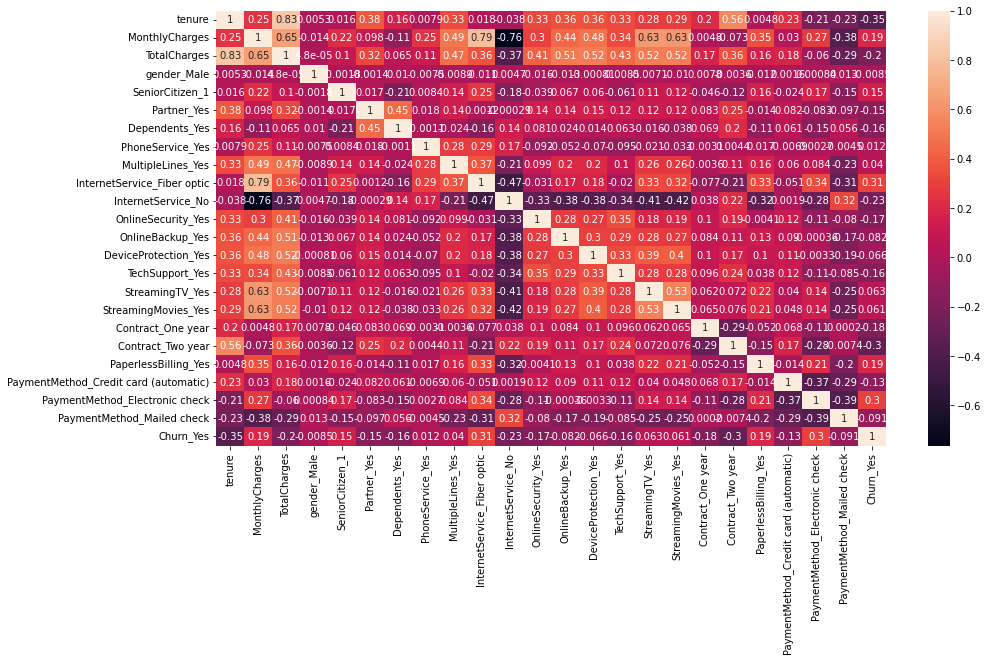

In [28]:

df_cleaned = df_f[colfinal]
plt.figure(figsize=(15,8))
sns.heatmap(df_cleaned.corr(), annot = True)

# Imbalanced data

In [29]:
#Dependent and independent variables 
X = df_cleaned.drop('Churn_Yes', axis=1)
Y = df_cleaned['Churn_Yes']

In [30]:
smote = SMOTE()

In [31]:
#Oversamplig our data
X, Y = smote.fit_resample(X, Y)

In [32]:
#Split our dataset on train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True)

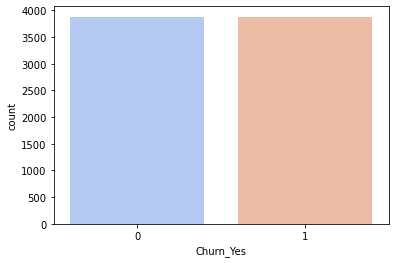

In [33]:
#Plot balanced data
sns.countplot(x=y_train, palette = "coolwarm");

# ML model

In [34]:
#Add an constant
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [35]:
#Training our model
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


In [36]:
#Results of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 7744
Model:                          Logit   Df Residuals:                     7720
Method:                           MLE   Df Model:                           23
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                     inf
Time:                        13:03:08   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6793      0.222     -3.063      0.002      -1.114      -0.245
tenure                                   -5.2506      0.406    -12.934      0.000      -6.046      -4.455
MonthlyCharges                           35.1676      2.126     16.544      0.000      31.001      39.334
TotalCharges                              4.7211      0.569      8.295      0.000       3.606       5.837
gender_Male                              -0.2243      0.062     -3.643      0.000      -0.345      -0.104
SeniorCitizen_1                          -0.0854      0.085     -1.006      0.315      -0.252       0.081
Partner_Yes                              -0.1026      0.076     -1.355      0.175      -0.251       0.046
Dependents_Yes                           -0.3531      0.087     -4.076      0.000      -0.523      -0.183
PhoneService_Yes                         -7.6383      0.444    -17.211      0.000      -8.508      -6.768
MultipleLines_Yes                        -1.6049      0.130    -12.310      0.000      -1.860      -1.349
InternetService_Fiber optic              -8.0300      0.529    -15.193      0.000      -9.066      -6.994
InternetService_No                        8.0974      0.553     14.636      0.000       7.013       9.182
OnlineSecurity_Yes                       -2.3884      0.134    -17.827      0.000      -2.651      -2.126
OnlineBackup_Yes                         -2.1610      0.130    -16.645      0.000      -2.415      -1.907
DeviceProtection_Yes                     -1.9079      0.130    -14.727      0.000      -2.162      -1.654
TechSupport_Yes                          -2.3104      0.137    -16.852      0.000      -2.579      -2.042
StreamingTV_Yes                          -3.3502      0.223    -15.020      0.000      -3.787      -2.913
StreamingMovies_Yes                      -3.2780      0.225    -14.551      0.000      -3.719      -2.836
Contract_One year                        -1.1693      0.104    -11.234      0.000      -1.373      -0.965
Contract_Two year                        -1.7116      0.162    -10.541      0.000      -2.030      -1.393
PaperlessBilling_Yes                      0.3186      0.070      4.562      0.000       0.182       0.455
PaymentMethod_Credit card (automatic)    -0.5322      0.105     -5.066      0.000      -0.738      -0.326
PaymentMethod_Electronic check           -0.0262      0.086     -0.304      0.761      -0.195       0.143
PaymentMethod_Mailed check               -0.4988      0.104     -4.776      0.000      -0.703      -0.294
=========================================================================================================
"""

In [37]:
#
colEliminar = []
while True:
    mayorPValue = model.pvalues.max()
    if mayorPValue > 0.05:
        indexMayorPValue = model.pvalues.argmax()
        colMayorPValue = model.pvalues.index[indexMayorPValue]
        colEliminar.append(colMayorPValue)
        print(colMayorPValue, mayorPValue)
        print('_______________________________')
        X_train.drop(colMayorPValue, axis = 1, inplace = True)
        model = sm.Logit(y_train, X_train).fit()
    else:
        break

PaymentMethod_Electronic check 0.7611452523184081
_______________________________
Optimization terminated successfully.
         Current function value: inf
         Iterations 8
SeniorCitizen_1 0.30669393352500307
_______________________________
Optimization terminated successfully.
         Current function value: inf
         Iterations 8
Partner_Yes 0.14233914042205736
_______________________________
Optimization terminated successfully.
         Current function value: inf
         Iterations 8


In [38]:
#Final model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 7744
Model:                          Logit   Df Residuals:                     7723
Method:                           MLE   Df Model:                           20
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                     inf
Time:                        13:03:08   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7299      0.211     -3.465      0.001      -1.143      -0.317
tenure                                   -5.3138      0.403    -13.179      0.000      -6.104      -4.524
MonthlyCharges                           35.2262      2.127     16.564      0.000      31.058      39.394
TotalCharges                              4.7332      0.569      8.322      0.000       3.619       5.848
gender_Male                              -0.2269      0.062     -3.688      0.000      -0.348      -0.106
Dependents_Yes                           -0.3893      0.077     -5.051      0.000      -0.540      -0.238
PhoneService_Yes                         -7.6392      0.444    -17.203      0.000      -8.510      -6.769
MultipleLines_Yes                        -1.6186      0.130    -12.438      0.000      -1.874      -1.364
InternetService_Fiber optic              -8.0614      0.528    -15.256      0.000      -9.097      -7.026
InternetService_No                        8.1162      0.553     14.672      0.000       7.032       9.200
OnlineSecurity_Yes                       -2.3896      0.134    -17.829      0.000      -2.652      -2.127
OnlineBackup_Yes                         -2.1611      0.130    -16.640      0.000      -2.416      -1.907
DeviceProtection_Yes                     -1.9130      0.130    -14.760      0.000      -2.167      -1.659
TechSupport_Yes                          -2.3055      0.137    -16.827      0.000      -2.574      -2.037
StreamingTV_Yes                          -3.3564      0.223    -15.046      0.000      -3.794      -2.919
StreamingMovies_Yes                      -3.2879      0.225    -14.591      0.000      -3.730      -2.846
Contract_One year                        -1.1617      0.104    -11.202      0.000      -1.365      -0.958
Contract_Two year                        -1.6905      0.161    -10.490      0.000      -2.006      -1.375
PaperlessBilling_Yes                      0.3147      0.070      4.516      0.000       0.178       0.451
PaymentMethod_Credit card (automatic)    -0.5089      0.090     -5.667      0.000      -0.685      -0.333
PaymentMethod_Mailed check               -0.4715      0.087     -5.390      0.000      -0.643      -0.300
=========================================================================================================
"""

In [39]:
X_test_1 = X_test[model.pvalues.index]

In [40]:
y_pred = model.predict(X_test_1)

In [41]:
y_pred_1 = (y_pred > 0.5).astype(int)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

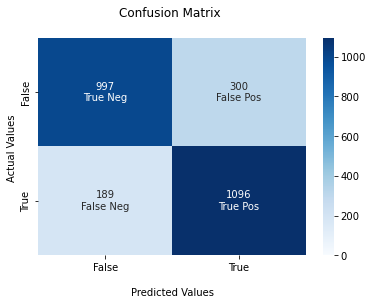

In [42]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_1)
counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
names = ['True Neg','False Pos','False Neg','True Pos']
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(counts,names)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, cmap='Blues', annot = labels, fmt='', vmin = 0)
ax.set_title('Confusion Matrix \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [43]:
#ROC curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred)

<AxesSubplot:>

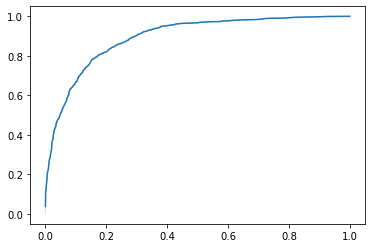

In [44]:
sns.lineplot(x = fpr, y = tpr)

In [45]:
#Area under the curve
roc_auc_score(y_test, y_pred_1)

0.8108076404993265